In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Alur Kerja AI
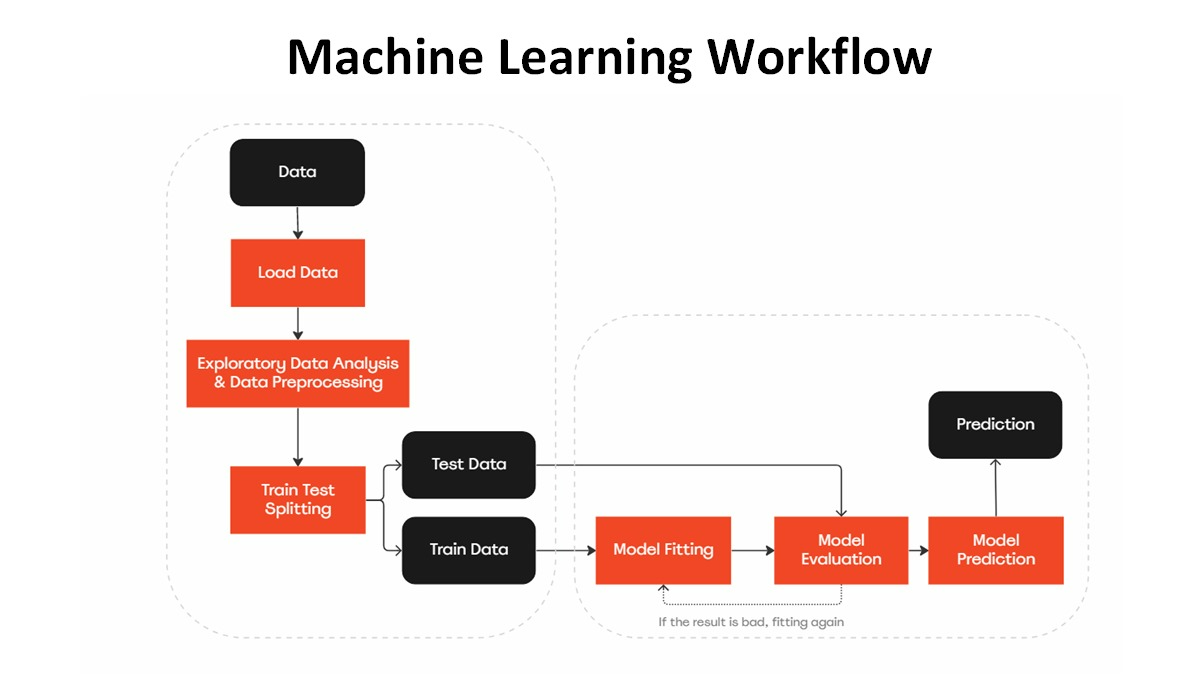

## Scikit pre processing
butuh label encoding untuk mengubah value dari beberrapa field menjadi angka

In [14]:
# load the data
file_path = '../Data/Raw/AIK_dataset_1_raw.csv'
data = pd.read_csv(file_path)

In [15]:
# print(data.head())
print(data.info())
# print(data[10:].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   brand                          193 non-null    object 
 1   fuel-type                      193 non-null    object 
 2   aspiration                     193 non-null    object 
 3   num-of-doors                   193 non-null    object 
 4   body-style                     193 non-null    object 
 5   drive-wheels                   193 non-null    object 
 6   engine-location                193 non-null    object 
 7   wheel-base                     193 non-null    float64
 8   length                         193 non-null    float64
 9   width                          193 non-null    float64
 10  height                         193 non-null    float64
 11  curb-weight                    193 non-null    int64  
 12  engine-type                    193 non-null    obj

In [16]:
# print(data.columns)
data = data.drop(columns=['clearance-volume-per-cylinder'])
data.head(10)

,brand,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130.0,mpfi,3.470000,3.436644,9.00000,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130.0,mpfi,3.470000,3.436644,9.00000,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152.0,mpfi,3.048853,3.470000,9.00000,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109.0,mpfi,3.190000,3.400000,10.00000,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136.0,mpfi,3.190000,3.400000,8.00000,115,5500,18,22,17450
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136.0,mpfi,3.190000,3.400000,8.50000,110,5500,19,25,15250
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136.0,mpfi,3.190000,3.400000,8.50000,110,5500,19,25,17710
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136.0,mpfi,3.190000,3.400000,8.50000,110,5500,19,25,18920
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131.0,mpfi,3.130000,3.400000,8.30000,140,5500,17,20,23875
9,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,...,108.0,mpfi,3.500000,2.806324,5.46875,101,5800,23,29,16430


In [17]:
# Encode categorical features
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [18]:
# Split data into features and target
X = data.drop('price', axis=1)  # Replace 'price' with your target column
y = data['price']

In [19]:
# Scale features (optional, depending on the model)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Train the model
model_RF = RandomForestRegressor(random_state=42)
model_RF.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [23]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression()

In [24]:
# Evaluate the model
y_pred_RF = model_RF.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_RF))
print("R² Score:", r2_score(y_test, y_pred_RF))

y_pred_LR = model_LR.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_LR))
print("R² Score:", r2_score(y_test, y_pred_LR))

Mean Absolute Error: 1631.37061965812
R² Score: 0.9331596301292362
Mean Absolute Error: 2720.1297674566517
R² Score: 0.8581208614613708


In [25]:
# Save predictions
output_RF = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_RF})
output_RF.to_csv('../Data/Processed/processed_RandomForest.csv', index=False)

output_LR = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_LR})
output_LR.to_csv('../Data/Processed/processed_LinearRegression.csv', index=False)

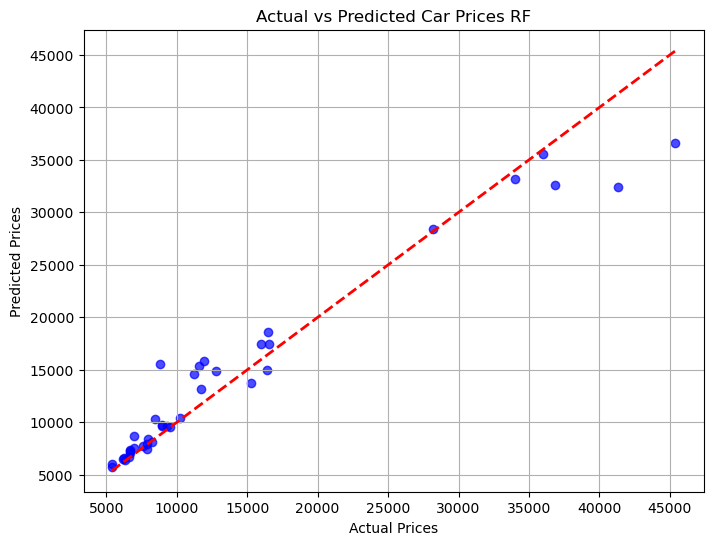

In [27]:
# visualisation
plt.figure(figsize=(8, 6))
plt.scatter(output_RF['Actual'], output_RF['Predicted'], alpha=0.7, color='blue')
plt.plot([output_RF['Actual'].min(), output_RF['Actual'].max()],
         [output_RF['Actual'].min(), output_RF['Actual'].max()],
         color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Car Prices RF')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

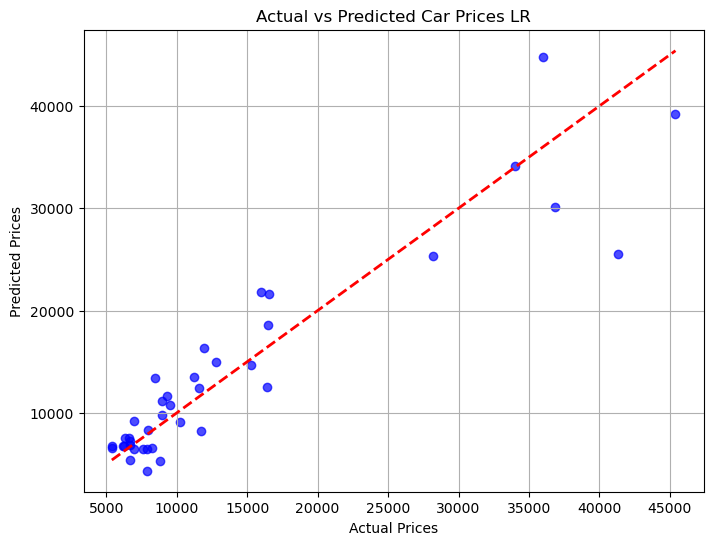

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(output_LR['Actual'], output_LR['Predicted'], alpha=0.7, color='blue')
plt.plot([output_LR['Actual'].min(), output_LR['Actual'].max()],
         [output_LR['Actual'].min(), output_LR['Actual'].max()],
         color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Car Prices LR')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()